<a href="https://colab.research.google.com/github/lyanausa/intromachinelearningpython/blob/main/Copy_of_Assignment_week2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment 2: Linear Regression and Logistic Regression
Welcom to the second assignment! During this assignment we will focus on performing linear and logistic regression and their applications. 


### Clone a github repository: 
From now on we put all our previously defined functions like ```gradient_descent```, and ```normalized_gradient_descent``` in a seperate python file called `intro2ML_functions`. We will keep updating this file with new functions that we define in each week so that you won't need to copy/paste them here again. This python file and all other required files and dataset will be uploaded to a github repository dedicated to this course. The only thing you need to do now is to clone this repository. Run the code below to do so. 

In [1]:
import sys
import os

# clone the github repository if it not already cloned
if not os.path.exists(os.getcwd()+'/introduction_to_ML'):
    !git clone https://github.com/bahareh368/introduction_to_ML.git
else:
    print('"/introduction_to_ML" already exists. If you want to update this folder for:\
    Colab: factory reset your runtime and run this cell again.\
    Jupytor Notebook: Delete the folder in your current directory and run this cell again.')

Cloning into 'introduction_to_ML'...
remote: Enumerating objects: 15, done.
remote: Counting objects: 100% (15/15), done.
remote: Compressing objects: 100% (15/15), done.
remote: Total 15 (delta 4), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (15/15), done.


If the code works correctly you should see the folder "introduction_to_ML" in your files. Click on the files icon on the vertical sidebar menu on the left, to see its content. 

### Import custom modules: 
To import an example custom module from this cloned repository, you first need to use sys.path.append() method to append or extend sys.path  to include new file paths that will point to modules we want to import.  Next you can import the module ```intro2ML_functions```. 

In [2]:
import sys

# append sys.path to include introduction_to_ML folder
sys.path.append("/content/introduction_to_ML")

# import introduction_to_ML
import intro2ML_functions as i2ml

## 1. Calculating derivitive
Although we will keep using `autograd` for automatic calculation of deravatives, it is still a good practice for you to calculate the derivatives of the two cost functions you learnt during the lectures (least square and softmax) by hand. Please write down all the steps and not only the final solution:

### 1.1.  Least square cost function: 

$g(\mathbf w)=\frac{1}{P}\sum_{p=1}^{P}(\mathring{ \mathbf x_p}^T \mathbf w-y_p)^2$

$\nabla g(\mathbf{w}) = $ <font color='blue'>$\frac{2}{P}\sum_{p=1}^{P}\mathring {\mathbf x_p} (\mathring{ \mathbf x_p}^T \mathbf w-y_p)$</font>

### 1.2.  softmax cost function: 

$g(\mathbf w)=\frac{1}{P}\sum_{p=1}^{P}\text{log}(1+e^{-y_p\mathring{ \mathbf x_p}^T \mathbf w})$

$\nabla g(\mathbf{w}) = $ <font color='blue'>$g(\mathbf w)=\frac{1}{P}\sum_{p=1}^{P}(-y_p^T\mathring{ \mathbf x_p})\cdot e^{-y_p\mathring{ \mathbf x_p}^T}\cdot\frac{1}{(1+e^{-y_p\mathring{ \mathbf x_p}^T \mathbf w})}$</font>

## 2. Linear regression

In this exercise you will work with some simple humidity versus pressure dataset and will try to fit a line to these datapoints. 

### 2.1. Loading the dataset
The dataset is included in the github repository as "humidity_pressure_dataset.csv". You can use `np.loadtxt` to load this data. The first row includes the one-dimensional input and the second row includes the output. Run the cell below to load the dataset. Note that you need to use the complete path to load the file.

In [3]:
import autograd.numpy as np

# load data
csvpath = 'introduction_to_ML/humidity_pressure_dataset.csv'
data = np.loadtxt(csvpath,delimiter = ',')

x = data[:-1,:] # input: pressure(millibars)
y = data[-1:,:] # output: Humidity 

print(x.shape)
print(y.shape)

(1, 25)
(1, 25)


In [4]:
# I added this Code box to look at the dataset: (you can ignore this)
import pandas as pd
df = pd.read_csv("introduction_to_ML/humidity_pressure_dataset.csv")
df.head()

,1.014399999999999977e+03,1.014200000000000045e+03,1.014470000000000027e+03,1.014450000000000045e+03,1.014490000000000009e+03,1.014519999999999982e+03,1.014159999999999968e+03,1.014240000000000009e+03,1.014250000000000000e+03,1.013960000000000036e+03,1.013850000000000023e+03,1.013039999999999964e+03,1.012220000000000027e+03,1.011440000000000055e+03,1.010519999999999982e+03,1.009830000000000041e+03,1.009259999999999991e+03,1.008759999999999991e+03,1.008360000000000014e+03,1.008110000000000014e+03,1.008149999999999977e+03,1.007850000000000023e+03,1.007889999999999986e+03,1.007360000000000014e+03,1.007259999999999991e+03
0,0.62,0.66,0.79,0.82,0.83,0.85,0.83,0.78,0.72,0.61,0.52,0.46,0.4,0.4,0.37,0.4,0.36,0.43,0.5,0.53,0.55,0.58,0.59,0.6,0.63


### 2.2. Plotting the data
A good practice before performing any analysis on the data is to visualize it. This is easy to do in case of one or two dimensional datasets. Complete the code below to produce a scatter plot of the dataset shoing data points as black dots. Don't forget to label your axis. We will ignore the units for now.

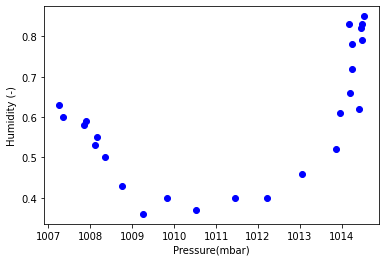

In [5]:
# Produce a scatter graph of Humidity against Pressure

# your code here
import matplotlib.pyplot as plt # import package for plotting
# ensure that the plot shows inline
%matplotlib inline 

plt.scatter(x,y, color = 'blue') # scatter plot
plt.xlabel("Pressure(mbar)") 
plt.ylabel("Humidity (-)")
plt.show() # prints the plot

### 2.3. Define a generalizable standarization method
As discussed briefly in the lecture, we should start with normalizing our inputs. To do so we define a function called `standard_normalizer(x)` that generates two functions `normalizer` that normalizes the input data "x" and `inverse_normalizer` that reverses the normalization.  Since this function will be used throughout the course, it should be able to handel input arrays with differents sizes. But we have to make sure that the rows always include the input dimension (features).

To normalize the data we first need to compute the mean and the standard deviation of each row (input dimension, features). Hint: Use `np.mean` and `np.std`, don't forget to set `axis = 1` and use `[:,np.newaxis]` to make sure the resulting arrays
have appropriate shapes. Next, use the results to define `standarize` and `inverse_standerize` lambda functions.

In [6]:
def standard_normalizer(x):
    # compute the mean and standard deviation of the input
    x_means = np.mean(x, axis=1)[:,np.newaxis]# your code here
    x_stds  = np.std(x, axis=1)[:,np.newaxis]# your code here  

    # check to make sure that x_stds > small threshold, for those not
    # divide by 1 instead of original standard deviation
    ind = np.argwhere(x_stds < 10**(-2))
    if len(ind) > 0:
        ind = [v[0] for v in ind]
        adjust = np.zeros((x_stds.shape))
        adjust[ind] = 1.0
        x_stds += adjust

    # create standard normalizer function
    normalizer = lambda data: (data - x_means)/x_stds # your code here

    # create inverse standard normalizer
    inverse_normalizer = lambda data: data*x_stds + x_means # your code here

    # return normalizer 
    return normalizer,inverse_normalizer

### 2.4. Normalize the input
you can now call the `standard_normalizer` function to normalize your input. The code below does so.

In [7]:
# return normalization functions 
normalizer,inverse_normalizer = standard_normalizer(x)

# normalize input by subtracting off mean and dividing by standard deviation
x = normalizer(x)

### 2.5. Define the model and the least square cost function
Before running the gradient descent we need to define the model and the least square cost function. It might seem a bit silly to define all these simple functions seperately while we can squeeze them in one single function. However doing so will help you later when you are dealing with more complicated problems and functions.  Using smaller functions  or the so called bookkeeping helps you (an others) to understand your code better and is also great for code legibility.

model: $\mathbf{a}_p = \mathring{\mathbf{x}}_p^T\mathbf{w} $

least square cost function: $g(\mathbf w)=\frac{1}{P}\sum_{p=1}^{P}(\mathring{ \mathbf x_p}^T \mathbf w-y_p)^2$

Complete the code below to define these to functions. You can repeat what we did during the lectures to define these functions. Make sure that the output of your model has the shape $P\times 1$, not the other way around.

In [8]:
# compute linear combination of input point
def model(x,w):
    a = w[0] + np.dot(x.T,w[1:]) 
    return a.T

# an implementation of the least squares cost function for linear regression
def least_squares(w):    
    # compute the least squares cost
    cost = np.sum((model(x,w)-y)**2) # your code here
    return cost/float(y.size)

### 2.6. Fitting a line to the dataset

fitting a line to the dataset means finding the appropriate weights. We use the `gradient_descent` function we defined in assignment 1 to do this. Since it is now included in `intro2ML_functions` you have to call it like `i2ml.gradient_descent`. Complete the code below to do so.

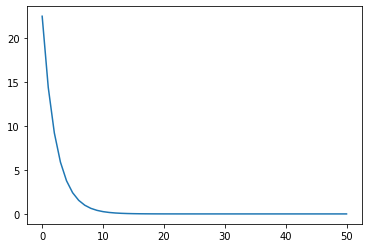

In [9]:
g = least_squares; # the cost function
w = np.array([-3.0,-3.0]); # your code here # randomly intialized w0
max_its = 50; 
alpha_choice = 0.1;

# run gradient descent
weight_history,cost_history = i2ml.gradient_descent(g, alpha_choice, max_its, w) # your code here
plt.plot(cost_history)

### 2.7. Plotting the fitting line
you can now plot the lines as you did in assignment 1. First use `np.linspace` to return evenly spaced samples, calculated over the interval [min(x), max(x)] and then use ```model``` and ```weight_history[max_its]``` to compute the outputs and then plot the line. Check assignement 1 for more help.

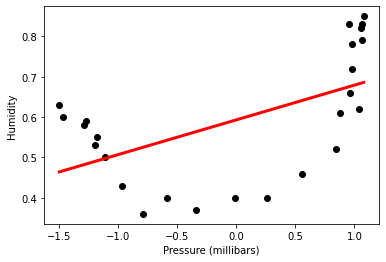

In [10]:
# plot the scatter plot and the fitted model
x2 = np.linspace(np.min(x), np.max(x), 50)[np.newaxis,:] # your code here
y2 = model(x2, weight_history[max_its])# your code here

plt.plot(x, y, 'o', color='black');
plt.plot(x2.T, y2.T,color='red',linewidth=3);
plt.xlabel('Pressure (millibars)'); plt.ylabel('Humidity');

As you can see, the model (red line) cannot fit to the data sufficiently and is far from the actual output. This is refered to as having a __high bias__. Bias refers to the error due to the the simplicity of the model which results in __under-fitting__. But How can we solve this issue still using linear models? Go to next exercise to find out more!

## 2. Polynomial regression with "sklearn"

To deal with high bias (under-fitting), we can increase the complexity of our models. This can be done by using higher order (polynomial) terms  of our input x that is x^2 and x^3 and etc. These higher order terms can then be considered as new features/dimensions. The model would then become:

$y= w_0 + w_1 x_1 + w_2 x_1^2 + w_3 x_1^3= w_0 + w_1 x_1 + w_2 x_2 + w_3 x_3$


The cell below shows how:

In [11]:
# make polynomial features
x_poly=np.vstack((x, x**2, x**3))
print(x_poly.shape)

(3, 25)


This can be very slow if we have multiple features because we need to consider all combinations of features. For example for 2 features and a second degree polynomial that is: [$x_1, x_2, x_1^2, x_2^2, x_1x_2$]. 

### 2.1. Sklearn: polynomial Features 
To convert the original features into their higher order terms we will use the ```PolynomialFeatures``` class provided by ```scikit-learn```. ```Scikit-learn``` provides a range of supervised and unsupervised learning algorithms via a consistent interface in Python. In this assignment we use it to perfom polynomial regression for an easier implementation. However, we mostly avoid using it throughout this course since as electrical engineers we don't like to use off-the-shelf functions! we like to learn everything in detail! But don't worry, later, once you know the concept, you can use it easily with a quick search of its functions on the internet.

Run the cell below to make polynomial features of 3rd degree. Note that the final features are [$1,x^1, x^2, x^3$]  with features as the columns including a bias column. so we have to use transpose for input an output of the function to fit our own definitins.

In [12]:
# use sklearn to make polynomial features of 3rd degree
from sklearn.preprocessing import PolynomialFeatures

degree=3
polynomial_features = PolynomialFeatures(degree) 
x_poly = polynomial_features.fit_transform(x.T).T
print(x_poly.shape)

(4, 25)


### 2.2. sklearn: linear regression

Next, we train the model using Linear Regression and fit it to the data. Complete the cell below to fit the model to the data.

In [13]:
from sklearn.linear_model import LinearRegression

model_LR = LinearRegression()
model_LR.fit(x_poly.T, y.T)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

### 2.3. predict values and plot the fitting line
Now use the higher density input "x2", defined before, to plot the fitting line. To do so, you first need to convert it to higher order terms using the same `polynomial_features` function you defined before and predict the values using the fitted linear model using `model.predict` function. Be careful of the appropriate shapes of inputs and output.

(4, 50)
(50, 1)


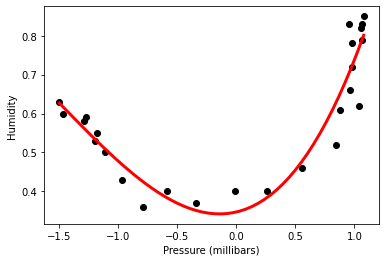

In [14]:
x2_poly= polynomial_features.fit_transform(x2.T).T# your code here
print(x2_poly.shape) # I added this to check the matrix size
y_poly_pred = model_LR.predict(x2_poly.T)# your code here
print(y_poly_pred.shape) # I added this to check the matrix size

#plot
plt.plot(x.T, y.T, 'o', color='black');
plt.plot(x2.T, y_poly_pred,color='red',linewidth=3);
plt.xlabel('Pressure (millibars)'); plt.ylabel('Humidity');

### 2.4. Higher degree polynomials
Complete the code cell below to produce same results as in part  2.1, 2.2 and 2.3 all together but now with `degree=12` (use only one cell!)

(13, 25)
(4, 50)
(50, 1)


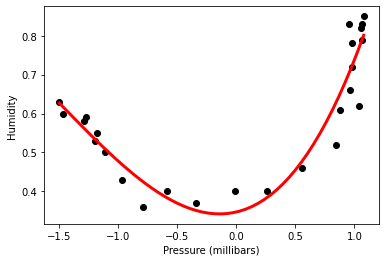

In [17]:
# your code here

# Introduce higher order terms and make an 12-degree model
degree_12 = 12
polynomial_features_12 = PolynomialFeatures(degree_12)
x_poly_12 = polynomial_features_12.fit_transform(x.T).T
print(x_poly_12.shape)

# Train the model: NO NEED TO MAKE NEW MODEL?!
#model_LR_12 = LinearRegression().fit(x_poly_12.T, y.T)

# Predict the values and plot the fitting line
x12_poly= polynomial_features.fit_transform(x2.T).T 
print(x12_poly.shape) 
y_poly_pred_12 = model_LR.predict(x12_poly.T)
print(y_poly_pred_12.shape) 

# Plot the dataset and the fitting line
plt.plot(x.T, y.T, 'o', color='black');
plt.plot(x2.T, y_poly_pred_12,color='red',linewidth=3);
plt.xlabel('Pressure (millibars)'); plt.ylabel('Humidity');



### 2.5. Conclusion

By comparing the final plots in 2.3 and 2.4 you can see that although the line in 2.4 is much closer to the datapoints and has a smaller final cost, it has high variations and may not be a good general fit to the data. As these variations are mainly caused by the noise in the data. This is referred to as having __high variance__. Which is due to the complex model trying to fit the data. High variance means the model passes through most of the data points and  __over-fitting__ the data as a result. However, the plot in 2.3 provides a good fit to the data points having both __low variance__ and __low bias__ even though the final cost might be a bit higher.  


### 3. Boston Housing dataset (Exercise 5.9)

Predicting the price of a given commodity is a particularly popular
application, and the so-called Boston Housing dataset is a readily available
example of such a problem. This dataset consists of a set of basic statistics (features) and corresponding prices (in dollars) for P = 506 houses in the city of Boston in the United States. The N = 13-dimensional input features include: per capita crime rate by town (feature 1), average number of rooms per dwelling (feature 6), weighted distances to five Boston employment centers (feature 8), and the percentage of the local population deemed ”lower class,” denoted LSTAT
(feature 13) and some other features. In this exercise we aim to fit a linear model on this multi-dimensional dataset.

### 3.1. Load the dataset
The dataset is similarly uploaded to the github repository as "boston_housing.csv". Load this dataset and print the size of input x and output y. They should be (13,506) and (1,506) respectively.

In [22]:
# load data
csvname =  'introduction_to_ML/boston_housing.csv'
data = np.loadtxt(csvname,delimiter=',')
x = data[:-1,:]
y = data[-1:,:]

print(np.shape(x))
print(np.shape(y))

(13, 506)
(1, 506)


In [23]:
# I added this Code box to look at the dataset: (you can ignore this)
df_Boston = pd.read_csv("introduction_to_ML/boston_housing.csv")
df_Boston.head()

,6.320000000000000097e-03,2.731000000000000094e-02,2.728999999999999829e-02,3.237000000000000294e-02,6.905000000000000027e-02,2.985000000000000153e-02,8.828999999999999349e-02,1.445500000000000118e-01,2.112400000000000111e-01,1.700399999999999967e-01,2.248900000000000066e-01,1.174700000000000050e-01,9.378000000000000225e-02,6.297599999999999865e-01,6.379599999999999715e-01,6.273900000000000032e-01,1.053930000000000033e+00,7.842000000000000082e-01,8.027100000000000346e-01,7.258000000000000007e-01,1.251789999999999958e+00,8.520400000000000196e-01,1.232469999999999954e+00,9.884300000000000308e-01,7.502600000000000380e-01,8.405399999999999539e-01,6.719100000000000072e-01,9.557700000000000085e-01,7.729899999999999549e-01,1.002450000000000063e+00,1.130810000000000093e+00,1.354719999999999924e+00,1.387990000000000057e+00,1.151720000000000077e+00,1.612819999999999920e+00,6.417000000000000481e-02,9.743999999999999884e-02,8.014000000000000290e-02,1.750500000000000111e-01,2.762999999999999831e-02,...,3.774979999999999780e+00,4.422279999999999767e+00,1.557569999999999943e+01,1.307510000000000083e+01,4.348790000000000155e+00,4.038409999999999833e+00,3.568680000000000074e+00,4.646889999999999965e+00,8.055790000000000006e+00,6.393119999999999692e+00,4.871410000000000018e+00,1.502340000000000053e+01,1.023300000000000054e+01,1.433370000000000033e+01.1,5.824010000000000353e+00,5.708179999999999588e+00,5.731160000000000032e+00,2.818379999999999885e+00,2.378569999999999851e+00,3.673669999999999991e+00,5.691749999999999865e+00,4.835670000000000357e+00,1.508599999999999941e-01,1.833700000000000052e-01,2.074600000000000055e-01,1.057400000000000007e-01,1.113200000000000023e-01,1.733099999999999918e-01,2.795699999999999852e-01,1.789900000000000102e-01,2.896000000000000241e-01,2.683800000000000074e-01,2.391199999999999992e-01,1.778299999999999881e-01,2.243799999999999961e-01,6.263000000000000511e-02,4.526999999999999774e-02,6.076000000000000151e-02,1.095900000000000069e-01,4.741000000000000075e-02
0,18.000,0.000,0.000,0.000,0.000,0.000,12.500,12.500,12.500,12.500,12.500,12.500,12.500,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,75.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
1,2.310,7.070,7.070,2.180,2.180,2.180,7.870,7.870,7.870,7.870,7.870,7.870,7.870,8.140,8.140,8.140,8.140,8.140,8.140,8.140,8.140,8.140,8.140,8.140,8.140,8.140,8.140,8.140,8.140,8.140,8.140,8.140,8.140,8.140,8.140,5.960,5.960,5.960,5.960,2.950,...,18.100,18.100,18.100,18.100,18.100,18.100,18.100,18.100,18.100,18.100,18.100,18.100,18.100,18.100,18.100,18.100,18.100,18.100,18.100,18.100,18.100,18.100,27.740,27.740,27.740,27.740,27.740,9.690,9.690,9.690,9.690,9.690,9.690,9.690,9.690,11.930,11.930,11.930,11.930,11.930
2,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
3,0.538,0.469,0.469,0.458,0.458,0.458,0.524,0.524,0.524,0.524,0.524,0.524,0.524,0.538,0.538,0.538,0.538,0.538,0.538,0.538,0.538,0.538,0.538,0.538,0.538,0.538,0.538,0.538,0.538,0.538,0.538,0.538,0.538,0.538,0.538,0.499,0.499,0.499,0.499,0.428,...,0.655,0.584,0.580,0.580,0.580,0.532,0.580,0.614,0.584,0.584,0.614,0.614,0.614,0.614,0.532,0.532,0.532,0.532,0.583,0.583,0.583,0.583,0.609,0.609,0.609,0.609,0.609,0.585,0.585,0.585,0.585,0.585,0.585,0.585,0.585,0.573,0.573,0.573,0.573,0.573
4,6.575,

### 3.2. Normalization
Because of the large variations in the input values of these datasets you should standard normalize the input features.

In [24]:
# return normalization functions "standard_normalizer" function that is included in i2ml library
normalizer,inverse_normalizer = i2ml.standard_normalizer(x)

# normalize input by subtracting off mean and dividing by standard deviation
x = normalizer(x)# your code here
print(np.shape(x))

(13, 506)


### 3.3. Fitting a hyperplane to the data

Complete the code below to run gradient descent on the dataset to find the optimal weights.

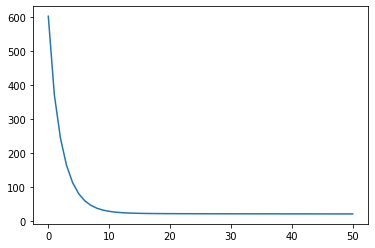

In [25]:
# run gradient descent
g = least_squares; 
n = 14 # Number n = N + 1, where N is the degree of input features
# This code below returns an array of random values
w = 0.1*np.random.randn(n,1)# your code here
max_its = 50; 
alpha_choice = 0.1;

weight_history,cost_history = i2ml.gradient_descent(g, alpha_choice, max_its, w)# your code here
plt.plot(cost_history)

### 3.4. MSE: mean square error
There are many ways to evaluate the quality of a trained model. A common way is to use the Least Squares cost. This also seems as a natural choice as we employ the same cost for training the model. To do this, we plug in our learned model parameters (optimal weights) in $\mathbf w^\star$ along with the data into the Least Squares cost, giving the so-called Mean Squared Error (or MSE for short):

$\text{MSE}=\frac{1}{P}\sum_{p=1}^{P}(\text{model}(\mathbf x_p,\mathbf w^\star)-y_p)^2$

complete the cell below to compute this value. 



In [26]:
# calculate MSE 
MSE= np.sum((model(x,w)-y)**2) # your code here #hint: use np.sum

print(MSE)
print(cost_history[-1])

305136.1522621991
22.15713190722155


As we also mentioned before, the MSE is equal to the final cost as it is computed with the optimal weights. 

### 3.5. Comparison
MSE error is data dependent and can not provide any meaningful result by itself. However, we can use it to compare the results of different algorithms on similar dataset. But does a lower MSE always indicate the best fit to the data? why?

<font color='blue'> A too low MSE can result in overfitting which means that the model can excellently predict the used dataset but will most probably fail with other "never-seen-before" samples. </font>

## 4. Credit Check (Example 6.11)

In this example we examine a two-class classification dataset consisting of
P = 1000 samples, each a set of statistics extracted from loan application to
a German bank. Each input has an associated label: either a
good (700 examples) or bad (300 examples) credit risk as determined by financial
professionals. In learning a classifier for this dataset, we create an automatic
credit risk assessment tool that can help decide whether or not future applicants are good candidates for loans.
The N = 20 dimensional input features in this dataset include: the individual’s
current account balance with the bank (feature 1), the duration (in months) of
previous credit with the bank (feature 2), the payment status of any prior credit taken out with the bank (feature 3), and the current value of their savings/stocks (feature 6). 

### 4.1. Loading the dataset

The dataset is included in the github repository as "credit_dataset.csv". Load the data and print it's shape. x and y should be of shape (20,1000) and (1,1000) respectively.

In [27]:
# load data
csvname = 'introduction_to_ML/credit_dataset.csv'
data = np.loadtxt(csvname,delimiter = ',')
x = data[:-1,:]
y = data[-1:,:] 

print(np.shape(x))
print(np.shape(y))

(20, 1000)
(1, 1000)


### 4.2. Normalization
Because of the large variations in the input values of these datasets you should standard normalize the input features.

In [28]:
# return normalization functions based on input x
normalizer,inverse_normalizer = i2ml.standard_normalizer(x)# your code here

# normalize input by subtracting off mean and dividing by standard deviation
x = normalizer(x)# your code here

### 4.3. Softmax cost function
As this is a classification problem, instead of the least-square cost, we should use the softmax cost:

 $g(\mathbf w)=\frac{1}{P}\sum_{p=1}^{P}\text{log}(1+e^{-y_p\mathring{ \mathbf x_p}^T \mathbf w})$. 

However, we can keep our linear model as before and we don't need to define it again. Complete the code below to do so.

In [29]:
# the convex softmax cost function
def softmax(w):
    cost = np.sum(np.log(1 + np.exp(-y*model(x,w))))# your code here
    return cost/float(np.size(y))

### 4.4. gradient descent with softmax cost
Complete the code below to run the gradient descent on the dataset to find the optimal weights. 

Text(0.5, 1.0, 'Cost')

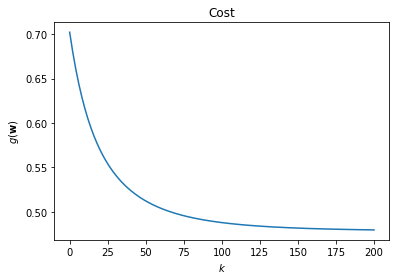

In [30]:
# run gradient descent
g = softmax # your code here;
n = 21 # Number n = N + 1, where N is the degree of input features
# This code below returns an array of random values
w = 0.1*np.random.randn(n,1) # your code here;
max_its = 200; 
alpha_choice = 0.1;

weight_history,cost_history = i2ml.gradient_descent(g,alpha_choice,max_its,w)# your code here

# plot cost function for a check
plt.plot(cost_history)
plt.xlabel(r'$k$'); plt.ylabel(r'$g(\mathbf{w})$'); plt.title('Cost')

### 4.5. Miss-classifications
Using the optimal weights first predict output class of all input values and then count the total number of the data points that were not classified correctly. Hint: you can use np.sign to compute the output class and use ```!=``` to compare the outputs. 

In [35]:
# count the nember of miss-classifications
#print(weight_history)
y_predict= LinearRegression().fit(weight_history,w)# your code here
#error= # your code here #hint: use np.sum
#print(error)

[array([[-0.05620543],
       [-0.03510934],
       [-0.11469294],
       [ 0.11398497],
       [-0.04456589],
       [ 0.02096137],
       [ 0.13529589],
       [-0.03999242],
       [ 0.04800172],
       [-0.1127595 ],
       [ 0.09978689],
       [ 0.1036067 ],
       [ 0.08493818],
       [-0.07925825],
       [ 0.09996175],
       [ 0.03133972],
       [ 0.03209308],
       [ 0.11910773],
       [ 0.01423684],
       [ 0.11441189],
       [ 0.04213327]]), array([[-0.03483863],
       [-0.0192722 ],
       [-0.1235178 ],
       [ 0.12100752],
       [-0.04346264],
       [ 0.01326019],
       [ 0.14036245],
       [-0.03498205],
       [ 0.04375897],
       [-0.10634579],
       [ 0.09965298],
       [ 0.10045825],
       [ 0.07604515],
       [-0.07522543],
       [ 0.10224632],
       [ 0.03156867],
       [ 0.03274593],
       [ 0.11364975],
       [ 0.01459017],
       [ 0.11216236],
       [ 0.0451083 ]]), array([[-0.01398963],
       [-0.00393395],
       [-0.13186372],
     

### 4.6. Evaluation
Is this a fair evaluation of the performance of our classification? What if we are overfitting the dataset? what other approach do you suggest to overcome this issue?

<font color='blue'> Write down your answer here!</font>